Now that you've learned about random forests and decision trees let's do an exercise in accuracy. You know that random forests are basically a collection of decision trees. But how do the accuracies of the two models compare?

So here's what you should do. Pick a dataset. It could be one you've worked with before or it could be a new one. Then build the best decision tree you can.

Now try to match that with the simplest random forest you can. For our purposes measure simplicity with runtime. Compare that to the runtime of the decision tree. This is imperfect but just go with it.

In [2]:
import math
import warnings

from IPython.display import display
import pandas as pd
import numpy as np
import scipy
import matplotlib.pyplot as plt
from sklearn import tree
from sklearn.model_selection import cross_val_score
import seaborn as sns
from sklearn import ensemble
%matplotlib inline

pd.options.display.float_format = '{:.3f}'.format

# Suppress annoying harmless error.
warnings.filterwarnings(
    action="ignore",
    module="scipy",
    message="^internal gelsd"
)

### Attribute information:

* sepal length in cm

* sepal width in cm

* petal length in cm

* petal width in cm

* class:
    * Iris Setosa
    * Iris Versicolour
    * Iris Virginica

In [3]:
iris = pd.read_csv("/Users/Jenny/Documents/Thinkful/random downloaded data/iris_data.csv")
iris.head(10)

,sepal-length,sepal-width,petal-length,petal-width,class
0,5.100,3.500,1.400,0.200,Iris-setosa
1,4.900,3.000,1.400,0.200,Iris-setosa
2,4.700,3.200,1.300,0.200,Iris-setosa
3,4.600,3.100,1.500,0.200,Iris-setosa
4,5.000,3.600,1.400,0.200,Iris-setosa
5,5.400,3.900,1.700,0.400,Iris-setosa
6,4.600,3.400,1.400,0.300,Iris-setosa
7,5.000,3.400,1.500,0.200,Iris-setosa
8,4.400,2.900,1.400,0.200,Iris-setosa
9,4.900,3.100,1.500,0.100,Iris-setosa


In [4]:
iris.describe()

,sepal-length,sepal-width,petal-length,petal-width
count,150.000,150.000,150.000,150.000
mean,5.843,3.054,3.759,1.199
std,0.828,0.434,1.764,0.763
min,4.300,2.000,1.000,0.100
25%,5.100,2.800,1.600,0.300
50%,5.800,3.000,4.350,1.300
75%,6.400,3.300,5.100,1.800
max,7.900,4.400,6.900,2.500


In [5]:
iris.corr()

,sepal-length,sepal-width,petal-length,petal-width
sepal-length,1.000,-0.109,0.872,0.818
sepal-width,-0.109,1.000,-0.421,-0.357
petal-length,0.872,-0.421,1.000,0.963
petal-width,0.818,-0.357,0.963,1.000


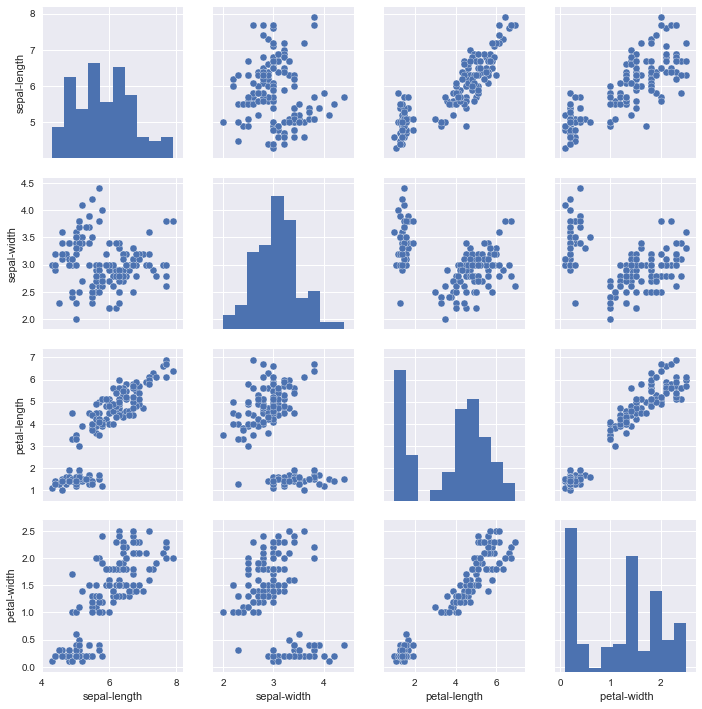

In [6]:
sns.pairplot(iris)

### Decision Tree

In [7]:
X = iris.iloc[:,:-1]
Y = iris.iloc[:,:-1]

In [12]:
# Import model
from sklearn import tree

# Help display visualizations
from IPython.display import Image

# Initialize and train tree
regressor_tree = tree.DecisionTreeRegressor(
    criterion='mse',
    max_depth=3,
    max_features=3
)

# Render tree
regressor_tree.fit(X, Y)
#export_graphviz(regressor_tree, out_file='regressor_tree.dot',feature_names=X.columns,
#   class_names=Y)

DecisionTreeRegressor(criterion='mse', max_depth=3, max_features=3,
           max_leaf_nodes=None, min_impurity_split=1e-07,
           min_samples_leaf=1, min_samples_split=2,
           min_weight_fraction_leaf=0.0, presort=False, random_state=None,
           splitter='best')

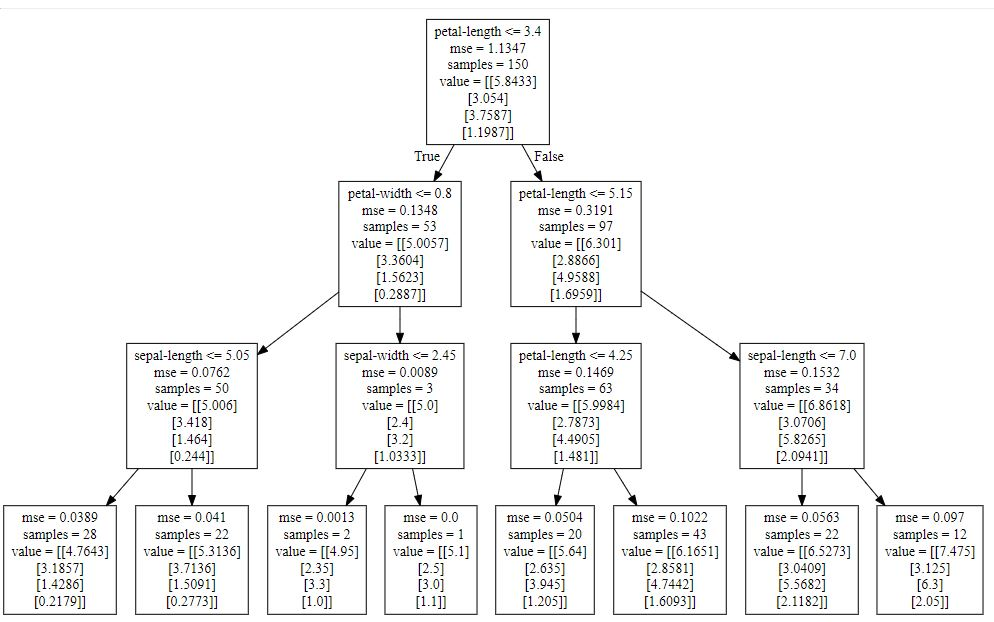

In [10]:
from IPython.display import Image
Image(filename='regressor_tree.jpg')

In [13]:
#cross validation

tree_score = cross_val_score(regressor_tree, X, Y, cv=5)
print('CV Score:\n', tree_score)
print('\n\nMean:', tree_score.mean(), '\n\nVariance:', tree_score.std()*2)

CV Score:
 [ 0.35592647  0.87798021  0.0571221   0.71244323  0.32835983]


Mean: 0.466366370619 

Variance: 0.585630209193


### Random Forest

In [14]:
regressor_forest = ensemble.RandomForestRegressor(
    max_depth=3,
    max_features=3
)

forest_score = cross_val_score(regressor_forest, X, Y, cv=5)
print('CV Score:\n', forest_score)
print('\n\nMean:', forest_score.mean(), '\n\nVariance:', forest_score.std()*2)

CV Score:
 [ 0.53858563  0.93329136  0.49133999  0.80799722  0.64345133]


Mean: 0.682933104279 

Variance: 0.331569859075


### Simplicity via Runtime

In [16]:
import time

In [17]:
#runtime of tree
start = time.time()

regressor_tree = tree.DecisionTreeRegressor(
    criterion = 'mse',
    max_depth = 3,
    max_features = 3
)

tree_Score = cross_val_score(regressor_tree, X, Y, cv=5)

end = time.time()
tree_time = end-start
print(tree_time)

0.0219423770904541


In [18]:
#runtime of forest
start = time.time()

regressor_forest = ensemble.RandomForestRegressor(
    max_depth = 3,
    max_features = 3
)

forest_score = cross_val_score(regressor_forest, X, Y, cv=5)

end = time.time()
forest_time = end-start
print(forest_time)

0.10856223106384277


In [19]:
print('Forest is', round(forest_time/tree_time, 2), 'times slower than the tree')

Forest is 4.95 times slower than the tree
